# VIEW функции и классы

   В Django представления (views) играют ключевую роль в MVC архитектуре (Model-View-Controller), обрабатывая запросы пользователей и возвращая соответствующие ответы. Представления могут быть реализованы как с помощью функций (Function-Based Views, FBV), так и с помощью классов (Class-Based Views, CBV).

   Сначала в своем приложении нужно создать функции-представления, затем по каждому представлению сформировать шаблон URL-адреса и, наконец, создать шаблоны HTML, чтобы прорисовывать сгенерированные представлениями данные. Каждое представление будет прорисовывать шаблон, передавая ему переменные, и возвращать HTTP-ответ с прорисованным результатом.

## Function-Based Views (FBV) 

   __Function-Based Views__ - это базовый способ написания представлений в Django. Они представляют собой простые функции Python, которые принимают веб-запросы и возвращают веб-ответы. Преимуществом Function-Based Views является их простота и прямолинейность.

   Примером представлений, представлений основанных на функциях, является представление, которое мы использовали в прошлой лекции:

In [ ]:
from django.http import HttpResponse
from django.urls import reverse

def index(request):
    another_page_url = reverse('tasks:another_page')
    html = f"<h1>Страница приложения tasks</h1><a href='{another_page_url}'>Перейти на другую страницу</a>"
    return HttpResponse(html)

Добавим новое представление для отображения списка всех проектов:

In [ ]:
from django.http import HttpResponse
from django.urls import reverse
from .models import Project, Task

def projects_list(request):
    projects = Project.objects.all()
    projects_html = '<h1>Список проектов</h1><ul>'
    for project in projects:
        projects_html += f"<li>{project.name}</li>"
    projects_html += "</ul>"
    return HttpResponse(projects_html)

   * __projects = Project.objects.all()__ запрашивает из базы данных все объекты модели Project.

И изменим наше представление __index()__:

In [ ]:
def index(request):
    projects_list_url = reverse('tasks:projects_list')
    html = f"<h1>Страница приложения tasks</h1><a href='{projects_list_url}'>Список проектов</a>"
    return HttpResponse(html)

В файле __tasks/urls.py__ добавим новый маршрут:

In [ ]:
from django.urls import path
from tasks import views

app_name = 'tasks'

urlpatterns = [
    path('', views.index),
    path('projects/', views.projects_list, name='projects_list'),

]

Запустим тестовый сервер и перейдем на http://127.0.0.1:8000/tasks/

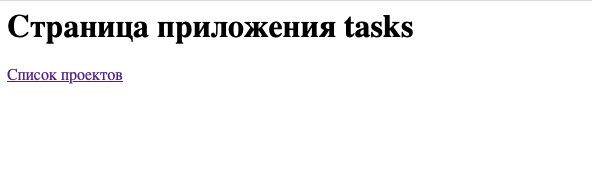

Главная страница приложения tasks изменилась, появилась ссылка на список проектов.
При нажатии на ссылку попадаем на страницу со списком всех проектов:

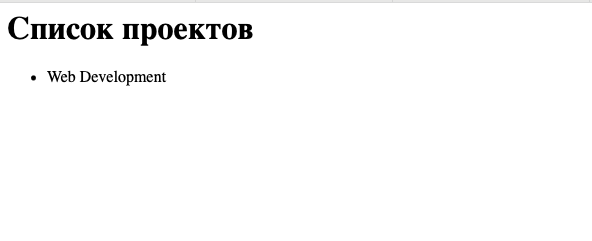

Для отображения детальной информации по каждому проекту и задачам добавим следующие представления:

In [ ]:
def project_detail(request, project_id):
    project = get_object_or_404(Project, id=project_id)
    tasks = project.tasks.all()
    response_html = f'<h1>{project.name}</h1><p>{project.description}</p>'
    response_html += '<h2>Задачи</h2><ul>'
    for task in tasks:
        response_html += f'<li><a href="tasks/{task.id}/">{task.name}</a></li>'
    response_html += '</ul>'
    return HttpResponse(response_html)

def task_detail(request, project_id, task_id):
    project = get_object_or_404(Project, id=project_id)
    task = get_object_or_404(Task, id=task_id, project=project)
    response_html = f'<h1>{task.name}</h1><p>{task.description}</p>'
    return HttpResponse(response_html)

   * __get_object_or_404(Project, id=project_id)__ получает объект Project по __project_id__. Если такого объекта нет, возвращается __ошибка 404__.

   Изменим представление __projects_list()__, чтобы каждый проект был гиперссылкой на детальную информацию о нем:

In [ ]:
def projects_list(request):
    projects = Project.objects.all()
    projects_html = '<h1>Список проектов</h1><ul>'
    for project in projects:
        projects_html += f'<li><a href="{project.id}/">{project.name}</a></li>'
    projects_html += '</ul>'
    return HttpResponse(projects_html)

   Добавим новые маршруты в __tasks/urls.py__:

In [ ]:
from django.urls import path
from tasks import views

app_name = 'tasks'

urlpatterns = [
    path('', views.index),
    path('projects/', views.projects_list, name='projects_list'),
    path('projects/<int:project_id>/', views.project_detail, name='project_detail'),
    path('projects/<int:project_id>/tasks/<int:task_id>/', views.task_detail, name='task_detail'),
]

   Страница по адресу http://127.0.0.1:8000/tasks/projects/ теперь выглядит так:

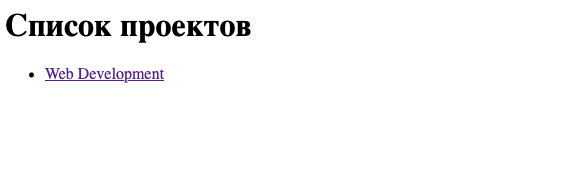

Нажав на название проекта перейдем к детальной информации о нем:

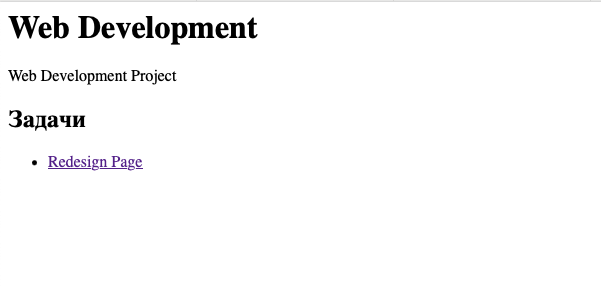

Нажав на название задачи внутри проекта перейдем к детальной информации о ней:

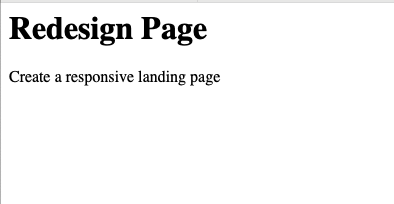

### Особенности Function-Based Views

   * Простота и ясность.
   * Лучше подходит для простых, одноразовых представлений.
   * Легче понять для новичков.

### Недостатки Function-Based Views

   * Может привести к дублированию кода в случае сложных представлений.
   * Менее гибкие в плане повторного использования кода.

## HTTP - методы

   Django обеспечивает простой и эффективный способ обработки HTTP-методов в вашем приложении. Вот как это работает:

   1. __GET-запросы в Django:__
   GET-параметры передаются через URL и могут быть получены с помощью __request.GET['param_name']__.
   2. __POST-запросы в Django:__
   POST-данные передаются в теле запроса и могут быть получены с помощью __request.POST['param_name']__.
   3. __PUT и DELETE-запросы в Django:__
   Django не предоставляет стандартных функций для обработки PUT и DELETE-запросов сразу из коробки. Однако, вы можете использовать дополнительные библиотеки, такие как __Django REST Framework__, для обработки этих методов.
   4. __PATCH-запросы в Django:__
   Обработка PATCH-запросов аналогична POST-запросам, но вы можете выбирать, какие поля ресурса обновлять.

### Пример

In [ ]:
from django.http import HttpResponse

def my_view(request):
    if request.method == 'GET':
        # Обработка GET-запроса
        return HttpResponse('Это GET-запрос')
    elif request.method == 'POST':
        # Обработка POST-запроса
        return HttpResponse('Это POST-запрос')
    else:
        # Обработка других методов
        return HttpResponse('Метод не поддерживается')

## Обработка ошибок

   В процессе разработки веб-приложений, обработка ошибок является важной частью. Ошибки могут возникнуть по разным причинам, и важно предоставить информацию о них пользователям приложения и эффективно управлять ошибками на сервере.

Django предоставляет механизмы для обработки ошибок на разных уровнях:

   1. __Уровень приложения__:
        * Вы можете определить собственные представления (views) для обработки конкретных ошибок.
        * Пример: Создание представления для обработки 404 ошибки (Page Not Found).<br></br>
   2. __Уровень проекта__:
        * Django также позволяет настроить обработчики ошибок на уровне всего проекта.
        * Пример: Настройка кастомной страницы 500 ошибки (Internal Server Error) для всего проекта.<br></br>
   3. __Уровень URL-маршрутов__:
        * Вы можете определить обработчики ошибок для конкретных URL-маршрутов.
        * Пример: Обработка 403 ошибки (Forbidden) для определенной части вашего сайта.

### Обработка ошибок 404 (Page Not Found)

__404 ошибка__ возникает, когда запрашиваемая страница не найдена. Для ее обработки в Django, вы можете создать кастомное представление и настроить его в __urls.py__. Пример:

In [ ]:
from django.shortcuts import render
from django.http import HttpResponseNotFound

def custom_404(request, exception):
    return render(request, '404.html', status=404)

И в __urls.py__:

In [ ]:
from django.urls import path
from . import views

handler404 = 'mysite.views.custom_404'

urlpatterns = [
    # Ваши другие URL-маршруты
]

### Обработка ошибок 500 (Internal Server Error)

__500 ошибка__ возникает, когда на сервере произошла внутренняя ошибка. Для ее обработки, вы можете создать кастомное представление и настроить его в __settings.py__. Пример:

In [ ]:
from django.shortcuts import render
from django.http import HttpResponseServerError

def custom_500(request):
    return render(request, '500.html', status=500)

В __settings.py__:

In [ ]:
handler500 = 'mysite.views.custom_500'

### Обработка других ошибок

   Вы также можете обрабатывать другие ошибки, такие как __403 (Forbidden)__ или __401 (Unauthorized)__, создавая аналогичные кастомные представления и настраивая их обработчики в __urls.py__ и __settings.py__.

### Обработка ошибок внутри представления

   Давайте рассмотрим пример обработки ошибок внутри представления в Django. Ниже приведен пример обработки __404 ошибки (Page Not Found)__:

In [ ]:
from django.http import Http404
from django.shortcuts import render

def my_view(request):
    try:
        # Код для получения данных или выполнения действия
        # Если данные не найдены или возникает ошибка, бросаем Http404
        result = some_function_to_get_data()
        if not result:
            raise Http404
        
        # Код для обработки данных
        # ...

        return render(request, 'template_name.html', context)
    
    except Exception as e:
        # Обработка других ошибок
        return render(request, 'error_template.html', {'error_message': str(e)})

   __Http404__ - это исключение (exception) в Django, которое используется для обработки 404 ошибки (Page Not Found). Когда Django не может найти запрошенную страницу или ресурс, оно вызывает это исключение.

   Теперь, когда 404 ошибка возникает, Django автоматически перенаправит запрос на кастомную страницу 404, которую вы указали в handler404. В этом случае, вам не нужно возвращать статус 404 вручную в вашей вьюхе, так как это уже обрабатывается Django.

## Асихронность в Django

   Асинхронность в Django предоставляет возможность обрабатывать запросы асинхронно, что может быть полезным для улучшения производительности вашего веб-приложения, особенно при работе с I/O-операциями, такими как запросы к базе данных или внешним API. В Django 3.1 и выше добавлена поддержка асинхронных представлений.

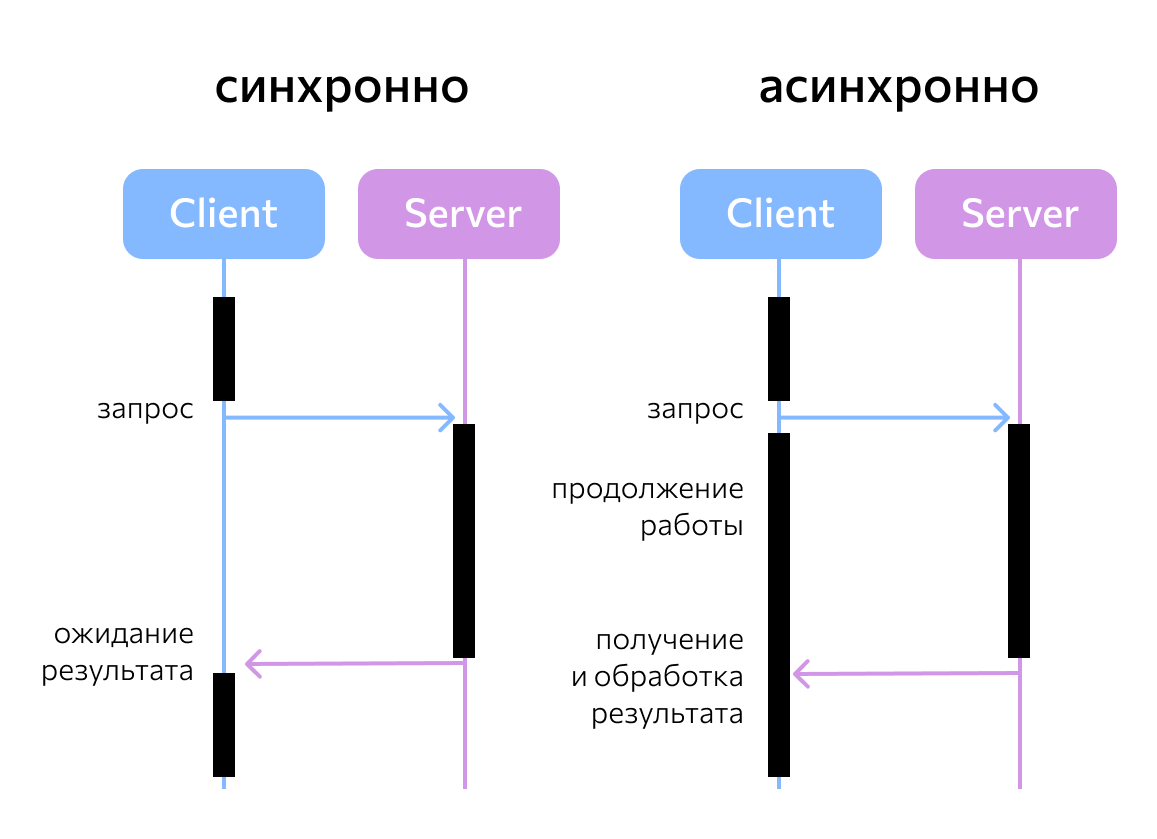

   1. __Асинхронные функции__:
        * Асинхронные представления в Django создаются с использованием ключевого слова __async__ перед определением функции представления.
        * Асинхронные функции могут содержать операторы __await__, которые указывают, что выполнение функции может быть приостановлено до завершения асинхронных операций.
        * Пример:

In [ ]:
from django.http import JsonResponse

async def async_view(request):
    await asyncio.sleep(1)  # Асинхронная операция задержки
    return JsonResponse({'message': 'Асинхронный ответ'})

   Если вы создаете асинхронные представления и используете асинхронные операции внутри них (например, с операторами await), Django будет использовать asyncio под капотом для управления выполнением асинхронных задач и событий. Вам не нужно беспокоиться о явном импорте asyncio, так как Django обрабатывает это за вас.

   2. __Использование await__:
        * __await__ используется для ожидания завершения асинхронных операций, таких как запросы к базе данных, внешним сервисам и другие асинхронные функции.
        * Пример:

In [ ]:
from django.http import JsonResponse

async def async_view(request):
    result = await async_function()
    return JsonResponse({'message': result})

   3. __Настройка асинхронной поддержки__:
        * Чтобы использовать асинхронные представления, ваш проект и сервер должны быть настроены для асинхронной поддержки. Это включает в себя использование асинхронной базы данных и асинхронного веб-сервера (например, ASGI сервера, такие как uvicorn или daphne).

   4. __Маршруты и URL-маршрутизация__:
        * Асинхронные представления могут быть использованы вместе с обычными представлениями в вашем приложении.
        * Маршруты для асинхронных представлений могут быть настроены так же, как и для обычных представлений с использованием модуля urls.py.

   5. __Обратная совместимость__:
        * Асинхронные представления добавлены в Django для улучшения производительности, но обратная совместимость с существующими обычными представлениями сохраняется.

### Зачем использовать асинхронность в Django

   * Улучшение производительности при работе с блокирующими операциями, такими как запросы к базе данных или внешним API.
   * Эффективная обработка большого количества одновременных запросов.
   * Более быстрый отклик вашего приложения на асинхронные операции.

### Когда использовать асинхронные представления

   * Когда ваше приложение выполняет множество асинхронных операций, которые могут замедлить его отклик.
   * При работе с I/O-операциями, которые блокируют поток выполнения, такими как сетевые запросы или долгие операции ввода-вывода.
   * Когда у вас есть определенные задачи, которые можно выполнять параллельно для улучшения общей производительности.

## Class-Based Views (CBV)

   Class-Based Views в Django - это более продвинутый способ создания представлений. Они используют классы Python для определения представлений, что позволяет легче управлять сложными представлениями и повторно использовать код.

   В Django есть несколько встроенных классов представлений, каждый предназначен для выполнения конкретных задач:

   * __DetailView__: Используется для отображения деталей конкретного объекта модели. Он автоматически извлекает объект из базы данных и передает его в шаблон.
   * __ListView__: Предназначен для отображения списка объектов модели. Он автоматически извлекает все объекты из базы данных и передает их в шаблон.
   * __CreateView__ и __UpdateView__: Предоставляют стандартные интерфейсы для создания и обновления объектов. Они автоматически обрабатывают формы и сохранение объектов.
   * __DeleteView__: Используется для удаления объекта. Он обрабатывает подтверждение удаления и сам производит удаление объекта.
   * __TemplateView__: Позволяет отобразить статический HTML-файл без привязки к модели. Он просто загружает указанный шаблон.
   * __RedirectView__: Используется для перенаправления запросов. Может быть использован для перенаправления на определенный URL или даже на другой класс представления.

   Все классы представлений в Django наследуются от базового класса __View__, а дочерние специализируются на различных задачах обработки и формирования результата.

   Добавим новые представления-аналоги:

__IndexView (аналог index)__

In [ ]:
from django.views import View

class IndexView(View):
    def get(self, request, *args, **kwargs):
        projects_list_url = reverse('tasks:projects_list')
        html = f"<h1>Страница приложения tasks</h1><a href='{projects_list_url}'>Список проектов</a>"
        return HttpResponse(html)

   * __IndexView__ наследует от базового класса __View__.
   * Метод __get__ определен для обработки GET-запросов. Этот метод генерирует HTML-страницу напрямую.

__ProjectsListView (аналог projects_list)__

In [ ]:
from django.views.generic import ListView

class ProjectsListView(ListView):
    model = Project

    def get(self, request, *args, **kwargs):
        projects = self.get_queryset()
        projects_html = '<h1>Список проектов</h1><ul>'
        for project in projects:
            projects_html += f'<li><a href="{project.id}/">{project.name}</a></li>'
        projects_html += '</ul>'
        return HttpResponse(projects_html)

   * __ProjectsListView__ наследует от __ListView__, предназначенного для отображения списка объектов.
   * __model = Project__ указывает, что представление будет работать с моделью __Project__.
   * Переопределен метод __get__, который получает список всех проектов и создает HTML-список, где каждый проект представлен ссылкой.

__ProjectDetailView (аналог project_detail)__

In [ ]:
from django.views.generic import DetailView

class ProjectDetailView(DetailView):
    model = Project
    pk_url_kwarg = 'project_id'

    def get(self, request, *args, **kwargs):
        self.object = self.get_object()
        project = self.object
        tasks = project.tasks.all()
        response_html = f'<h1>{project.name}</h1><p>{project.description}</p>'
        response_html += '<h2>Задачи</h2><ul>'
        for task in tasks:
            response_html += f'<li><a href="tasks/{task.id}/">{task.name}</a></li>'
        response_html += '</ul>'
        return HttpResponse(response_html)

   * __ProjectDetailView__ наследует от __DetailView__, предназначенного для отображения деталей конкретного объекта.
   * __pk_url_kwarg = 'project_id'__ указывает, что идентификатор проекта в URL будет передан как __project_id__.
   * В методе __get__ мы получаем текущий объект проекта с помощью __self.get_object()__.

__TaskDetailView (аналог task_detail)__

In [ ]:
class TaskDetailView(DetailView):
    model = Task
    pk_url_kwarg = 'task_id'

    def get(self, request, *args, **kwargs):
        task = self.get_object()
        response_html = f'<h1>{task.name}</h1><p>{task.description}</p>'
        return HttpResponse(response_html)

   * __TaskDetailView__ также наследует от __DetailView__.
   * __pk_url_kwarg = 'task_id'__ указывает, что идентификатор задачи в URL будет передан как __task_id__.
   * В методе __get__ мы получаем задачу с помощью __self.get_object()__.

   В каждом из этих представлений мы переопределяем метод get, что демонстрирует гибкость Class-Based Views.

   Чтобы использовать __Class-Based Views__ в __urls.py__ приложения tasks, нужно обновить способ, которым эти представления включаются в пути URL. Вместо ссылки на функции представлений, следует использовать атрибут __as_view()__ соответствующих классов представлений.

In [ ]:
from django.urls import path
from tasks import views

app_name = 'tasks'

urlpatterns = [

    # path('', views.index),
    # path('projects/', views.projects_list, name='projects_list'),
    # path('projects/<int:project_id>/', views.project_detail, name='project_detail'),
    # path('projects/<int:project_id>/tasks/<int:task_id>/', views.task_detail, name='task_detail'),
    
    path('', views.IndexView.as_view(), name='index'),
    path('projects/', views.ProjectsListView.as_view(), name='projects_list'),
    path('projects/<int:project_id>/', views.ProjectDetailView.as_view(), name='project_detail'),
    path('projects/<int:project_id>/tasks/<int:task_id>/', views.TaskDetailView.as_view(), name='task_detail'),
]

### Особенности Class-Based Views

   * Более структурированный подход к написанию представлений.
   * Лучше подходят для создания сложных и масштабируемых приложений.
   * Упрощают повторное использование кода.

### Недостатки Class-Based Views

   * Более высокий порог входа для начинающих.
   * Могут быть избыточными для очень простых задач.

### Применение

   __Когда использовать Function-Based Views, а когда Class-Based Views?__ Это зависит от конкретного случая. Function-Based Views идеально подходят для быстрого создания простых представлений, в то время как Class-Based Views лучше использовать для более сложных интерфейсов, где требуется повторное использование компонентов.

#### Применение Class-Based Views:
   Желательно использовать для создания стандартных веб-страниц, таких как списки объектов и формы. Django предоставляет множество встроенных классов представлений, таких как ListView, DetailView, CreateView, UpdateView и DeleteView, которые значительно упрощают работу.

# Домашнее задание

Используя представления из домашнего задания к прошлой лекции напишите:
   1. __Function-Based Views для отображения главной странице приложения quality_control.__<br></br>
   
   2. __Class-Based Views для отображения главной страницы приложения quality_control.__<br></br>
   
   3. __Function-Based Views для списка BugReport__:
       * Напишите __Function-Based Views__, которое отображает список всех __BugReport__.
       * Для каждого баг-репорта отобразите его title, status и ссылку на детальное представление.<br></br> 
       
   4. __Class-Based Views для деталей BugReport__:
       * Используя __DetailView__, напишите __Class-Based Views__ для отображения деталей баг-репорта.
       * Отобразите title, description, status, priority, и информацию о связанном проекте и задаче.<br></br>
   
   5. __Function-Based Views для списка FeatureRequest__:

       * Напишите __Function-Based Views__ для отображения списка всех __FeatureRequest__.
       * Для каждого запроса на улучшение отобразите его title, status и ссылку на детальное представление.<br></br>
   
   6. __Class-Based Views для деталей FeatureRequest__:
       * Напишите __Class-Based Views__ на основе __DetailView__ для отображения деталей запроса на улучшение.
       * Отобразите title, description, status, priority, и информацию о связанном проекте и задаче.<br></br>
   
   7. __Настройка URL-маршрутов__:
       * Настройте URL-маршруты для всех новых представлений.

Ссылка на документацию Django: https://docs.djangoproject.com/en/5.0/